# Basics

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Lets start with grayscale

This plots two pixels

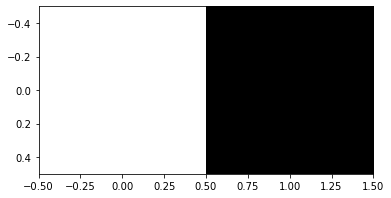

In [2]:
# plt image show is a method that plots an image by looking at a 2-D matrix
# lowest value in list is white, highest being black
plt.imshow([[0,1]], cmap='Greys')

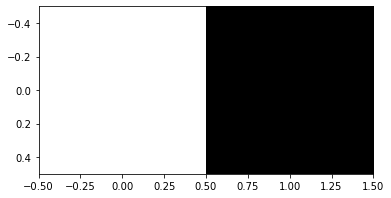

In [3]:
# Note 0 does not mean white. it was just the lowest value. So for example
plt.imshow([[-1,0]], cmap='Greys')

So what about 3 values?

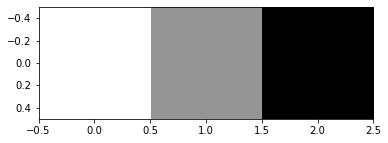

In [4]:
plt.imshow([[-1,0,1]], cmap='Greys')

Do you have to use greys?

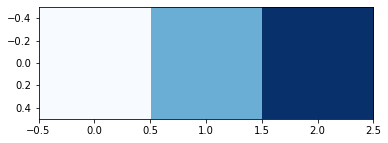

In [5]:
plt.imshow([[-1,0,1]], cmap='Blues')

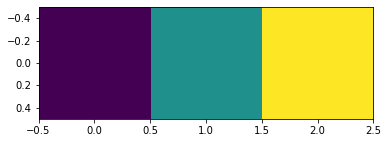

In [37]:
#Default color pallete. Python uses as distinct a color pallette
plt.imshow([[-1,0,1]])

Its standard convention for single channel images to show in grey, but any color map can be used. Think about it, if we were to break images down on color spectrum we think of color/b&w pictures as a basic grouping.

Depending upon the 'bitdepth', the more range of values in the data, and as you can imagine, more shades appear.

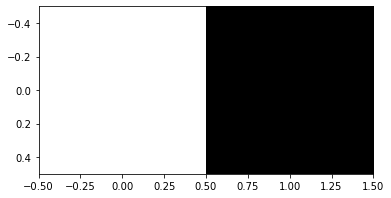

In [38]:
#1-bit
plt.imshow([[0,1]], cmap='Greys')

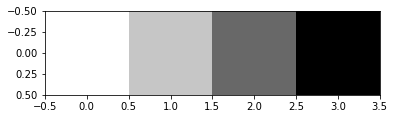

In [39]:
#2-bit
plt.imshow([[0,1,2,3]], cmap='Greys')

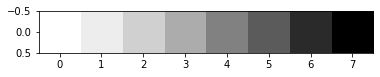

In [96]:
#3-bit
plt.imshow([[0,1,2,3,4,5,6,7]], cmap='Greys')

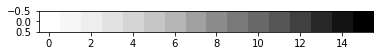

In [41]:
#4-bit (1byte)
plt.imshow([[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]], cmap='Greys')

Everyday images are in general 8-bit, which is why you'll see values ranging from 0-255

In [42]:
bit8_array = np.arange(0,256)
bit8_array

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

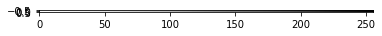

In [148]:
#4-bit (1byte)
plt.imshow([bit8_array], cmap='Greys')

Imshow has a hard time displaying all of it on 1-D

We can change the aspect ratio so we can better see the gradient.

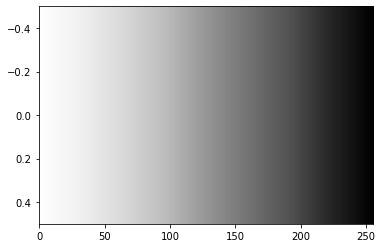

In [150]:
#4-bit (1byte)
plt.imshow([bit8_array], cmap='Greys', aspect='auto')

Having just 1 'channel' of image information is like having just 2-D data information, like in the examples above


However, in RGB, you have 3 channels of information. So imagine a 3-D tensor. Yeah, 3-D information for a 2-D image.
Each channel will contain information for each color, pixel by pixel.



So for a _8-bit_ RGB image

__R channel__: an array of values 0-255 just showing red values

__G channel__: an array of values 0-255 just showing green values

__B channel__: an array of values 0-255 just showing blue values

### NOTE: 
Even though imshow has so far been using 

lowest_value:white

highest_value:black



__Standard convention for RGB images__

0:black

255: maximum color (channel respective. eg: R channel, 255 max red)



__Therefore, for RGB images__

black pixel is [0,0,0]

white pixel is [255,255,255]

red pixel is [255,0,0]

green pixel is [0,255,0]

blue pixel is [0,0,255]

mid gray is [125,125,125]


General convention of image dimensions when being used in imshow (and just about anywhere else), the first 2 are width x height (Think 1920x1080)
3rd implies channels.

Lets startsimple.\
Lets create a 4bit RGB image

In [173]:
bit4_channel = np.arange(0,256)
RGB = np.dstack([bit4_channel,bit4_channel,bit4_channel]).reshape(1,256,3)
RGB.shape

(1, 256, 3)

So this is a 16x16 image with 3 channels. 

So, RGB here is "3-D", width: 256, height: 1, channels:3

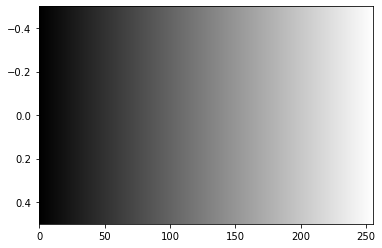

In [176]:
plt.imshow(RGB,aspect = 'auto')

Ok... whats going on? Lets look at 0,0.

In [177]:
RGB[0,0]

array([0, 0, 0])

R value: 0 (pure black)\
G value: 0 (pure black)\
B value: 0 (pure black)\

Result: pure black

Lets look at 0,125

In [179]:
RGB[0,125]

array([125, 125, 125])

Ok. 125 on all channels

Perfectly Gray

Ok. So that means, perfectly white

In [180]:
RGB[0,255]

array([255, 255, 255])

## Total random channels

Lets randomize each channel

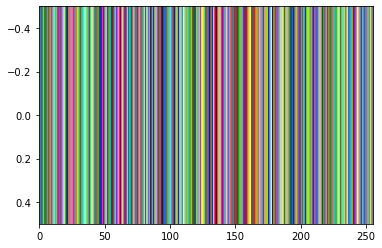

In [194]:
random_RGB = np.random.randint(low=0,high=255,size=(1,256,3))
plt.imshow(random_RGB,aspect='auto')

Ok... not as pretty as I was hoping

## Red Gradient

In [232]:
r_channel = np.arange(0,256).reshape(1,256,1)
g_channel = np.zeros((1,256,1),dtype=int)
b_channel = np.zeros((1,256,1),dtype=int)

In [233]:
RGB = np.dstack([r_channel,g_channel,b_channel])
RGB.shape

(1, 256, 3)

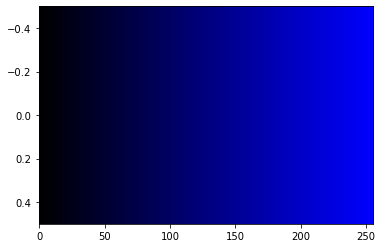

In [245]:
 plt.imshow(RGB,aspect='auto');

## Green Gradient

In [237]:
r_channel = np.zeros((1,256,1),dtype=int)
g_channel = np.arange(0,256).reshape(1,256,1)
b_channel = np.zeros((1,256,1),dtype=int)

In [238]:
RGB = np.dstack([r_channel,g_channel,b_channel])
RGB.shape

(1, 256, 3)

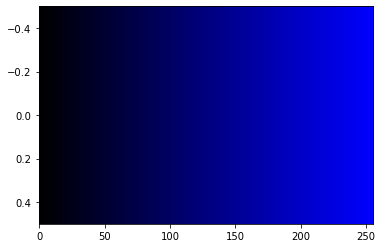

In [244]:
 plt.imshow(RGB,aspect='auto');

## Blue Gradient

In [240]:
r_channel = np.zeros((1,256,1),dtype=int)
g_channel = np.zeros((1,256,1),dtype=int)
b_channel = np.arange(0,256).reshape(1,256,1)

In [241]:
RGB = np.dstack([r_channel,g_channel,b_channel])
RGB.shape

(1, 256, 3)

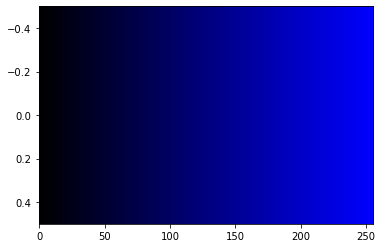

In [243]:
 plt.imshow(RGB,aspect='auto');

In [89]:
bit4_channel_R = np.arange(0,256,1).reshape(16,16)
bit4_channel_G = np.hstack([np.arange(0,256,1),np.arange(255,-1,-1)])[::2].reshape(16,16)

bit4_channel_B = np.hstack([np.arange(0,256,1),
                            np.arange(255,-1,-1),
                           np.arange(0,256,1)])[::3].reshape(16,16)

In [90]:
bit4_channel_R.shape, bit4_channel_G.shape, bit4_channel_B.shape

((16, 16), (16, 16), (16, 16))

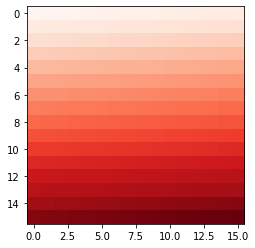

In [91]:
 plt.imshow(bit4_channel_R,'Reds',)

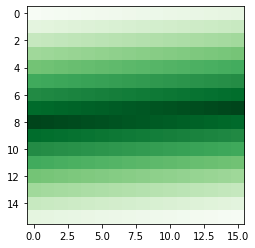

In [92]:
 plt.imshow(bit4_channel_G,'Greens',)

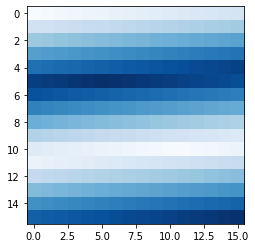

In [93]:
 plt.imshow(bit4_channel_B,'Blues',)

In [94]:
RGB_new = np.dstack([bit4_channel_R,
                  bit4_channel_G,
                  bit4_channel_B])
RGB_new.shape

(16, 16, 3)

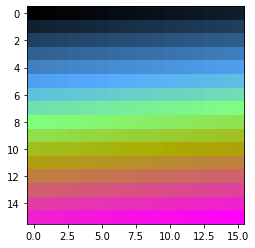

In [95]:
 plt.imshow(RGB_new)

Pretty. Lets look at a few points

In [85]:
print(f'TopLeft: {RGB_new[0,0]}')
print(f'TopRight: {RGB_new[15,0]}')
print(f'BottomLeft: {RGB_new[0,15]}')
print(f'BottomRight: {RGB_new[15,15]}')

TopLeft: [0 0 0]
TopRight: [240  31 208]
BottomLeft: [15 30 45]
BottomRight: [255   1 253]


Cool. Lets plot this as a gradient. Lets look at the tile method. All it does it can stack multiple copies of the same array.

In [106]:
# Lets look a the tile method
bit3_1D = np.arange(0,8)
bit3_1D

array([0, 1, 2, 3, 4, 5, 6, 7])

In [113]:
bit3_1D_tiled = np.tile(bit3_1D,(3,1))
bit3_1D_tiled

array([[0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7]])

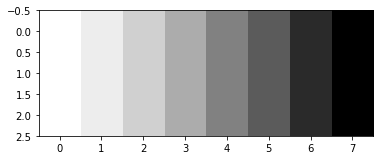

In [112]:
plt.imshow(bit3_1D_tiled, cmap='Greys')

Lets replicate this for our color image from above

In [137]:
bit4_channel_R = np.arange(0,256,1)
bit4_channel_G = np.hstack([np.arange(0,256,1),np.arange(255,-1,-1)])[::2]

bit4_channel_B = np.hstack([np.arange(0,256,1),
                            np.arange(255,-1,-1),
                           np.arange(0,256,1)])[::3]

In [142]:
numberOfTiles = 100
bit4_channel_R_tiled = np.tile(bit4_channel_R,(numberOfTiles,1))
bit4_channel_G_tiled = np.tile(bit4_channel_G,(numberOfTiles,1))
bit4_channel_B_tiled = np.tile(bit4_channel_B,(numberOfTiles,1))

In [143]:
RGB_new = np.dstack([bit4_channel_R_tiled,
                  bit4_channel_G_tiled,
                  bit4_channel_B_tiled])
RGB_new.shape

(100, 256, 3)

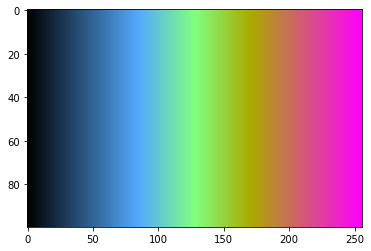

In [146]:
 plt.imshow(RGB_new, aspect='auto')